# Examen

#### Instrucciones

- Crea en tu carpeta, un archivo llamado `examen` y pega el texto de las problemas en él (respeta el formato).

- Contesta inmediatamente abajo del problema.

- Gráficas en calidad profesional (pon ejes, unidades, colores, leyenda, etc.)

- La ortografía, redacción y habilidades de comunicación se tomarán en cuenta.

### Problema 1

In [1]:
#Importacion de herramientas
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

(a) Usando `Simpy`, declara las funciones:
$$
y(x) = \cos(x)
$$

$$
z(x) = \sin(x)
$$

$$
w(x) = \frac{1}{\sin(x) + \cos(2x)}
$$

In [2]:
x = symbols('x')
y = cos(x)
z = sin(x)
w = 1/(sin(x)+cos(2*x))

(b) Obtén la derivada de $g(x)$

$$
g(x) = y(x)*z(x)
$$

In [22]:
g = y * z
g_ = diff(g,x)
g_

-sin(x)**2 + cos(x)**2

(c) Grafica $w(x)$ en el rango $[0,1]$

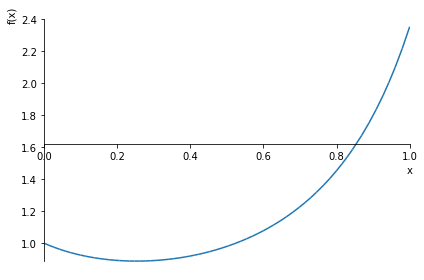

In [4]:
grafica_w = plot(w, (x,0,1))

(d) Integra de manera indefinida $w(x)$ y luego evalúala desde $0$ a $1$.

In [5]:
integ_indef_w = integrate(w, x)

In [6]:
integ_indef_w
#solo se obtiene la integral sin evaluar

Integral(1/(sin(x) + cos(2*x)), x)

In [23]:
integ_def_w = integrate(w, (x, 0,1)).evalf()
#al usar evalf(), evalua numericamente la integralinteg_def_w


(e) ¿Cuál es el límite de $y(x), z(x), g(x)$ y $w(x)$ cuando $x \to 0$.?

<span style="color:green">1, 0, 0 y 1 respectivamente</span>.

In [8]:
lim_y = limit(y, x, 0)
lim_z = limit(z, x, 0)
lim_g = limit(g, x, 0)
lim_w = limit(w, x, 0)

In [9]:
lim_y

1

In [10]:
lim_z

0

In [11]:
lim_g

0

In [12]:
lim_w

1

(f) Expanda $y(x)$ y $z(x)$ hasta 3 orden en serie de Taylor.

In [13]:
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

def serie_taylor(funcion, orden=3):
    if funcion == sin(x):
        serie = 0
        i = 1
        #¿Por que orden *2? Porque si se que se saltara la mitad de los contadores
        #solo ocupo doblar el numero de ciclos para obtener los terminos que me piden
        while i <= orden*2:
            if(i%2 == 1):
                serie = serie + (-1)**(i/2)*((x**i) / factorial(i))                
            i = i+1
        serie = serie + x
        return serie
            
    if funcion == cos(x):
        serie = 0
        i = 0
        paridad = 1
        while i <= orden*2:
            if(i%2 == 0):
                serie = serie + (-1)**(paridad)*((x**i) / factorial(i))  
                paridad = paridad + 1
            i = i+1
        serie += 1
        return serie
        
        
serie_taylor_y = serie_taylor(y)
serie_taylor_z = serie_taylor(z)

In [14]:
serie_taylor_y

x**6/720 - x**4/24 + x**2/2

In [15]:
serie_taylor_z
#existe un problema con el epsilon de la maquina, dandome cantidades infimas

x**5*(3.06161699786838e-16 + 1.0*I)/120 + x**3*(-1.83697019872103e-16 - 1.0*I)/6 + x + x*(6.12323399573677e-17 + 1.0*I)

<div class="alert alert-info">
    
**NOTA** Muestra las expresiones en cada inciso.
</div>

### Problema 2

El [**atractor de Rössler**](http://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) esta descrito por el siguiente conjunto de ecuaciones:

$$
\frac{dx}{dt} = -y -z
$$

$$
\frac{dy}{dt} = x + ay
$$

$$
\frac{dz}{dt} = b + z(x-c)
$$

(a) Resuelva las ecuaciones numéricamente para 

$$
a=0.13 \quad b=0.2 \quad c=6.5 
$$

y condiciones iniciales

$$
x(0)=0 \quad y(0)=0 \quad z(0)=0 
$$

use el método de Runge-Kutta de 2do orden.

In [16]:
#Se define rossler, el cual hara pequeños cambios
def rossler(x1, y1, z1, a=0.13, b=0.2, c=6.5):
    dxdt = -y1-z1
    dydt = x1 + a*y1
    dzdt = b + z1*(x1-c)

    return dxdt, dydt, dzdt

In [76]:
#Se dan las condiciones iniciales
a = 0.13
b = 0.2
c = 6.5

N = 100
x_arr=zeros(N)
y_arr=zeros(N)
z_arr=zeros(N)

x_arr[0] = 0.0
y_arr[0] = 0.0
z_arr[0] = 0.0

#Arbitrariamente escojemos el delta, y tomamos 100 muestras de tiempo
delta = 0.1
tiempo = np.linspace(0, 100, N)

In [77]:
i=0
for i in range(N):
    dxdt, dydt, dzdt = rossler(x_arr[i], y_arr[i], z_arr[i])
    
    x_arr[i + 1] = x_arr[i] + (dxdt * delta)
    y_arr[i + 1] = y_arr[i] + (dydt * delta)
    z_arr[i + 1] = z_arr[i] + (dzdt * delta)
#generamos los valores a partir de las condiciones iniciales, tomando n valores

(b) Muestra en una gráfica el comportamiento de las soluciones en el tiempo (i.e. grafica $x(t)$, $y(t)$ y $z(t)$).

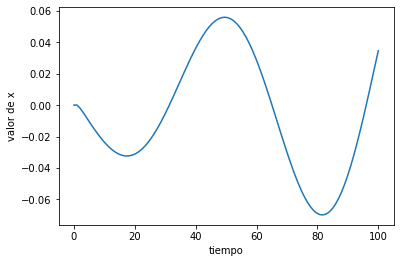

In [101]:
plt.plot(tiempo, x_arr[:N])
plt.xlabel("tiempo")
plt.ylabel("valor de x")
plt.show()

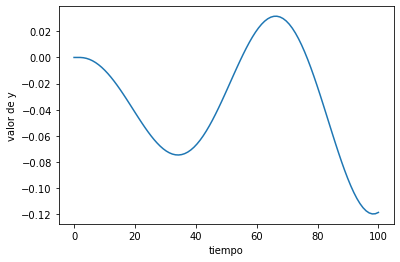

In [100]:
plt.plot(tiempo, y_arr[:N])
plt.xlabel("tiempo")
plt.ylabel("valor de y")
plt.show()

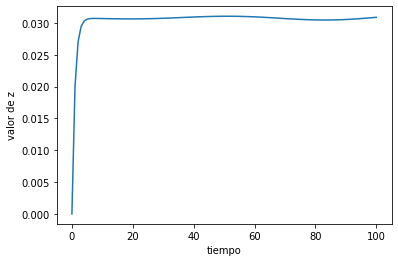

In [99]:
plt.plot(tiempo, z_arr[:N])
plt.xlabel("tiempo")
plt.ylabel("valor de z")
plt.show()

(c) Muestra como se ve el **atractor de Rössler** en 3D (i.e. en el espacio).

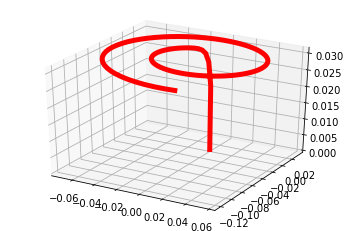

In [102]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
plt.plot(x_arr[:i], y_arr[:i], z_arr[:i],'-',color='red',lw=5)
plt.show()